In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


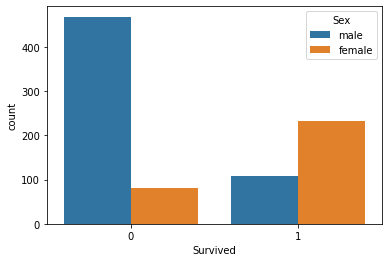

In [6]:
sns.countplot(x='Survived',hue='Sex',data=data)

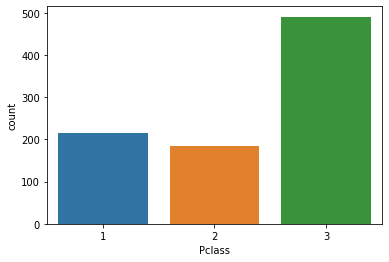

In [7]:
sns.countplot(x='Pclass',data=data)

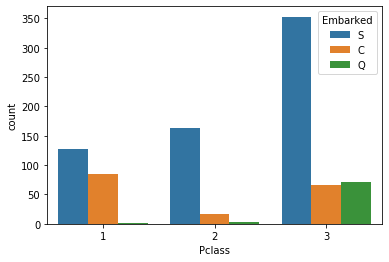

In [8]:
sns.countplot(x='Pclass',hue='Embarked',data=data)

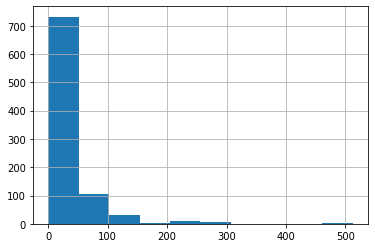

In [9]:
data['Fare'].hist()

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

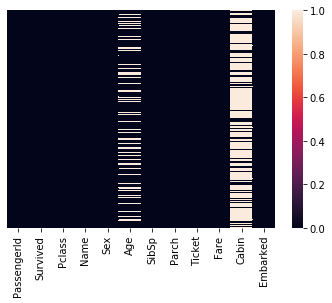

In [11]:
sns.heatmap(data.isnull(),yticklabels=False)

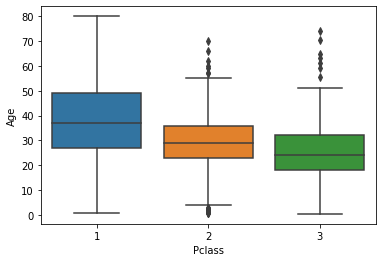

In [12]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [13]:
data.drop('Cabin',axis=1,inplace=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [18]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
pcl=pd.get_dummies(data['Pclass'],drop_first=True)

In [19]:
data=pd.concat([data,sex,embark,pcl],axis=1)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [21]:
data.drop(['PassengerId','Pclass','Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [22]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [23]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
logis=LogisticRegression()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knc=KNeighborsClassifier()
logis.fit(X_train,y_train)
knc.fit(X_train,y_train)
dt.fit(X_train,y_train)
rfc.fit(X_train,y_train)

C:\Users\paras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions=logis.predict(X_test)
pred_knc=knc.predict(X_test)
pred_dt=dt.predict(X_test)
pred_rfc=rfc.predict(X_test)


In [30]:
print(classification_report(y_test,predictions))
print(classification_report(y_test,pred_dt))
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.77      0.67      0.72        89

    accuracy                           0.78       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       125
           1       0.66      0.78      0.72        89

    accuracy                           0.74       214
   macro avg       0.74      0.75      0.74       214
weighted avg       0.75      0.74      0.74       214

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       0.75      0.72      0.74        89

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.78      0.79      0.78       214



In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test,predictions))
print(confusion_matrix(y_test,pred_dt))
print(confusion_matrix(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_knc))

[[107  18]
 [ 29  60]]
[[90 35]
 [20 69]]
[[104  21]
 [ 25  64]]
[[90 35]
 [43 46]]


In [33]:
from sklearn.metrics import accuracy_score

In [37]:
print(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,pred_knc))
print(accuracy_score(y_test,pred_dt))
print(accuracy_score(y_test,pred_rfc))
print(accuracy_score(y_test,pred_knc))

0.780373831775701
0.6355140186915887
0.7429906542056075
0.7850467289719626
0.6355140186915887
